In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Implementación del Leap Frog Estadistico impulsivo

El algoritmo es el siguiente:

\begin{aligned}
& v=v\left(t-\frac{1}{2} h\right)+a h \\
& \Delta v=-f v+\sqrt{f(2-f)\left(k_{\mathrm{B}} T_{\mathrm{ref}} / m\right)} \xi \\
& x(t+h)=x(t)+\left(v+\frac{1}{2} \Delta v\right) h \\
& v\left(t+\frac{1}{2} h\right)=v+\Delta v \\
\end{aligned}

Siendo a

\begin{aligned}
&a=-\nabla \frac{V_1(x, y)}{m}=-\nabla \frac{V_{1 x}(x)}{m}-\nabla \frac{V_{1 y}(y)}{m} \\
& -\nabla \frac{V_{1 y}(y)}{m}=-\frac{k_y}{m} y \quad \quad-\nabla \frac{V_{1 x}(x)}{m}= \begin{cases}-\frac{V_0}{m x_M} & \text { si } 0 \leq x \leq x_M, \\
\frac{V_0}{m\left(2 l_0-x_M\right)} & \text { si } x_M \leq x \leq 2 l_0 .\end{cases} \\
\end{aligned}

EL codigo fue implementado en cython. Cython es un compilador estático optimizador tanto para el lenguaje de programación Python como para el lenguaje de programación Cython extendido (basado en Pyrex). Hace que escribir extensiones C para Python sea tan fácil como el propio Python.

In [15]:
# Constantes
GM = 1.0
dt = 1e-3
Nsteps = int(1e3)  # Reducimos el número de pasos para la demostración
Nparticles = 10  # Número de partículas a simular

class Cuerpo:
    def __init__(self, x0, y0, Vx0, Vy0, m0):
        self.m = m0
        self.r = np.array([x0, y0])
        self.V = np.array([Vx0, Vy0])
        self.F = np.zeros(3)  # Inicializamos la fuerza a cero

    #Ecuacion de langevin
    def CalculeFuerza(self):
        self.F = np.zeros(2)
        
    

    def Arranque(self, dt):
        self.r = self.r - dt*self.V  # Simplificamos para la demostración

    #Leap frog estadistico impulsivo
    def Muevase(self, dt, f, KT):
        N = 2 # Número de dimensiones
        xi = np.random.normal(0,1,2)
        self.V = self.V + (dt/self.m)*self.F
        DeltaV = -f*self.V + np.sqrt((2-f)*f*(KT/self.m))*xi
        self.r = self.r + dt*(self.V +0.5*DeltaV)
        self.V = self.V + 0.5*DeltaV



In [16]:
#Parametros de la simulacion
KT = 1.0
f = 0.5
Nparticles = 10  # Número de partículas a simular
dt=1e-3
Nsteps=int(1e5)
StepsPerFrame=int(1e2)
Nframes=Nsteps//StepsPerFrame


In [24]:
#Condiciones Iniciales
particulas = np.empty(Nparticles, dtype=object)
for _ in range(Nparticles):
    x0, y0 = np.random.rand(2) * 10  # Posiciones iniciales aleatorias
    Vx0, Vy0 = np.random.rand(2) * 2 - 1  # Velocidades iniciales aleatorias
    m0 = np.random.rand() + 0.1  # Masa aleatoria
    particulas[_] = Cuerpo(x0, y0, Vx0, Vy0, m0)




In [28]:
xdata=np.zeros((Nframes,Nparticles))
ydata=np.zeros((Nframes,Nparticles))

for i in range(Nsteps):
    t=i*dt
    
    for j in range(Nparticles):
        if(i%StepsPerFrame==0):
            k = i//StepsPerFrame
            xdata[k][j]=particulas[j].r[0]
            ydata[k][j]=particulas[j].r[1]
        particulas[j].CalculeFuerza()
        particulas[j].Muevase(dt,f,KT)

In [32]:
xdata.shape

(1000, 10)

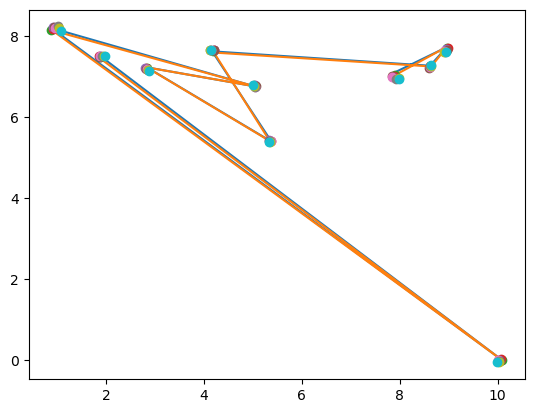

In [34]:
plt.plot(xdata[0],ydata[0],'-',label='particula 1')
plt.plot(xdata[1],ydata[1],'-',label='particula 2')
plt.plot(xdata[2],ydata[2],'o',label='particula 3')
plt.plot(xdata[3],ydata[3],'o',label='particula 4')
plt.plot(xdata[4],ydata[4],'o',label='particula 5')
plt.plot(xdata[5],ydata[5],'o',label='particula 6')
plt.plot(xdata[6],ydata[6],'o',label='particula 7')
plt.plot(xdata[7],ydata[7],'o',label='particula 8')
plt.plot(xdata[8],ydata[8],'o',label='particula 9')
plt.plot(xdata[9],ydata[9],'o',label='particula 10')
plt.show()

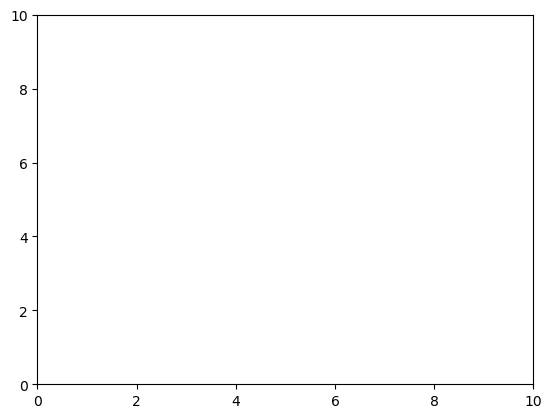

In [31]:
# Preparación de la animación
fig, ax = plt.subplots()
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
line, = ax.plot([], [], 'o')

def init():
    line.set_data([], [])
    return line,

def run(i):
    xdata = [p.r[0] for p in particulas]
    ydata = [p.r[1] for p in particulas]
    print(xdata, ydata)
    line.set_data(xdata, ydata)
    for p in particulas:
        
        p.CalculeFuerza()
        p.Muevase(dt,f,KT)
    return line,



ani = animation.FuncAnimation(fig, run, frames=Nsteps, init_func=init, blit=True)

plt.show()

In [19]:
run(10)

[6.150510270558042, 4.525233030925982, 4.411903108388965, 8.673032201761622, 5.698702708945977, 8.342576809740978, 6.135324233566052, 7.511263562858497, 4.34356743677586, 0.31171943128980195] [6.9151864222169435, 3.753811473448443, 3.591615829404915, 0.01995167750294735, 4.915394446830115, 6.183496179398663, 2.4886149912121858, 0.6562868034189562, 2.4736706187286837, 7.1398540231999705]


(<matplotlib.lines.Line2D at 0x24c5a5bba90>,)